In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the dataset 
data = pd.read_csv('lung_msk_2017_clinical_data.tsv', sep='\t')
#show the data
data

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Clinical Trial,Driver Mutations,Durable Clinical Benefit,Fraction Genome Altered,...,Sex,Smoking History,Somatic Status,SO comments,Stage At Diagnosis,Target Therapy,TMB (nonsynonymous),Chemotherapy,Tumor Purity,Patient's Vital Status
0,lung_msk_2017,P-0000036,P-0000036-T01-IM3,57,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,ROS1,YES,0.0185,...,Female,Never,Unmatched,NaN,IV,YES,7.764087,YES,30.0,AWD
1,lung_msk_2017,P-0000082,P-0000082-T01-IM3,56,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,KRAS,NO,0.3606,...,Male,Former heavy,Matched,NaN,IA,YES,1.109155,YES,NaN,AWD
2,lung_msk_2017,P-0000110,P-0000110-T01-IM3,66,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,EGFR_WT_AMP,NaN,0.2474,...,Male,Former heavy,Matched,NaN,IV,NO,16.637330,YES,50.0,AWD
3,lung_msk_2017,P-0000133,P-0000133-T01-IM3,79,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,PIK3CA,NaN,0.0026,...,Female,Never,Matched,NaN,IIIB,NO,4.436621,YES,30.0,AWD
4,lung_msk_2017,P-0000149,P-0000149-T01-IM3,50,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,ERBB2,YES,0.2691,...,Female,Former light,Matched,NaN,IV,YES,9.982398,YES,20.0,DOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,lung_msk_2017,P-0009959,P-0009959-T01-IM5,65,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,KRAS,NaN,0.1985,...,Male,Former heavy,Matched,NaN,IV,NO,2.936159,YES,20.0,AWD
911,lung_msk_2017,P-0010041,P-0010041-T01-IM5,46,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,ALK,YES,0.2027,...,Male,Never,Matched,NaN,IV,YES,0.978720,NO,70.0,AWD
912,lung_msk_2017,P-0010257,P-0010257-T01-IM5,54,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,BRAF,NO,0.1834,...,Female,Former heavy,Matched,NaN,IV,YES,9.787197,YES,30.0,DOD
913,lung_msk_2017,P-0010466,P-0010466-T01-IM5,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,MET,NO,0.1345,...,Female,Former light,Matched,NaN,IV,NO,1.957439,NO,20.0,AWD


In [4]:
print("Total number of samples:",len(data))

Total number of samples: 915


In [5]:
data.describe()

,Diagnosis Age,Fraction Genome Altered,Number Treatment Lines Prior To Receiving Impact Results,Mutation Count,Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,915.000000,915.000000,914.000000,915.000000,915.000000,915.000000,915.000000,820.000000
mean,62.716940,0.191131,0.564551,7.832787,1.122404,712.645902,7.931942,38.867073
std,11.983289,0.187469,0.946945,8.072119,0.337792,260.633665,8.217923,20.344965
min,9.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,5.000000
25%,56.000000,0.023000,0.000000,3.000000,1.000000,538.500000,2.936159,20.000000
50%,64.000000,0.143100,0.000000,6.000000,1.000000,712.000000,5.872318,37.500000
75%,71.000000,0.303750,1.000000,10.000000,1.000000,891.000000,9.982398,50.000000
max,93.000000,0.841400,7.000000,90.000000,3.000000,2073.000000,96.496511,90.000000


In [6]:
data.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age', 'Cancer Type',
       'Cancer Type Detailed', 'Clinical Trial', 'Driver Mutations',
       'Durable Clinical Benefit', 'Fraction Genome Altered', 'Gene Panel',
       'Immunotherapy', 'Institute Source',
       'Number Treatment Lines Prior To Receiving Impact Results',
       'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Patient Histology', 'Primary Tumor Site',
       'Recurrent/metastatic disease', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage',
       'Sample pre any Lung Therapy', 'Sample Type', 'Sex', 'Smoking History',
       'Somatic Status', 'SO comments', 'Stage At Diagnosis', 'Target Therapy',
       'TMB (nonsynonymous)', 'Chemotherapy', 'Tumor Purity',
       'Patient's Vital Status'],
      dtype='object')

In [7]:
print("The total number of columns in this data set are", len(data.columns))

The total number of columns in this data set are 35


In [8]:
data.isnull().any()

Study ID                                                    False
Patient ID                                                  False
Sample ID                                                   False
Diagnosis Age                                               False
Cancer Type                                                 False
Cancer Type Detailed                                        False
Clinical Trial                                               True
Driver Mutations                                            False
Durable Clinical Benefit                                     True
Fraction Genome Altered                                     False
Gene Panel                                                  False
Immunotherapy                                                True
Institute Source                                            False
Number Treatment Lines Prior To Receiving Impact Results     True
Metastatic Site                                              True
Mutation C

In [ ]:
####### Visualizing the unclean data

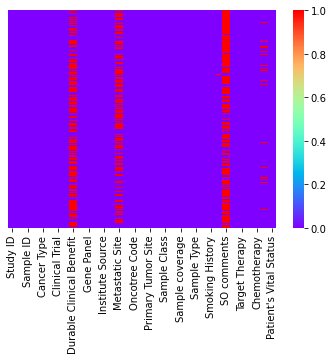

In [9]:
sns.heatmap(data.isnull(), cmap="rainbow", yticklabels= False)

In [ ]:
#################  CLEANING THE DATA ##################

In [10]:
data.duplicated().any()

False

In [11]:
#dropping insignificant columns that give a null value.
data1=data.drop(["Somatic Status","SO comments","Clinical Trial","Metastatic Site"], axis=1)
data1.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age', 'Cancer Type',
       'Cancer Type Detailed', 'Driver Mutations', 'Durable Clinical Benefit',
       'Fraction Genome Altered', 'Gene Panel', 'Immunotherapy',
       'Institute Source',
       'Number Treatment Lines Prior To Receiving Impact Results',
       'Mutation Count', 'Oncotree Code', 'Overall Patient Histology',
       'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage',
       'Sample pre any Lung Therapy', 'Sample Type', 'Sex', 'Smoking History',
       'Stage At Diagnosis', 'Target Therapy', 'TMB (nonsynonymous)',
       'Chemotherapy', 'Tumor Purity', 'Patient's Vital Status'],
      dtype='object')

In [12]:
data1.isnull().any()

Study ID                                                    False
Patient ID                                                  False
Sample ID                                                   False
Diagnosis Age                                               False
Cancer Type                                                 False
Cancer Type Detailed                                        False
Driver Mutations                                            False
Durable Clinical Benefit                                     True
Fraction Genome Altered                                     False
Gene Panel                                                  False
Immunotherapy                                                True
Institute Source                                            False
Number Treatment Lines Prior To Receiving Impact Results     True
Mutation Count                                              False
Oncotree Code                                               False
Overall Pa

In [13]:
#cleaning data by removing rows that have null values
clean_data = data1.dropna()

#verifying that there are no null values
clean_data.isnull().any()

Study ID                                                    False
Patient ID                                                  False
Sample ID                                                   False
Diagnosis Age                                               False
Cancer Type                                                 False
Cancer Type Detailed                                        False
Driver Mutations                                            False
Durable Clinical Benefit                                    False
Fraction Genome Altered                                     False
Gene Panel                                                  False
Immunotherapy                                               False
Institute Source                                            False
Number Treatment Lines Prior To Receiving Impact Results    False
Mutation Count                                              False
Oncotree Code                                               False
Overall Pa

In [14]:
print("The total number of samples in the cleaned data",len(clean_data))

The total number of samples in the cleaned data 342


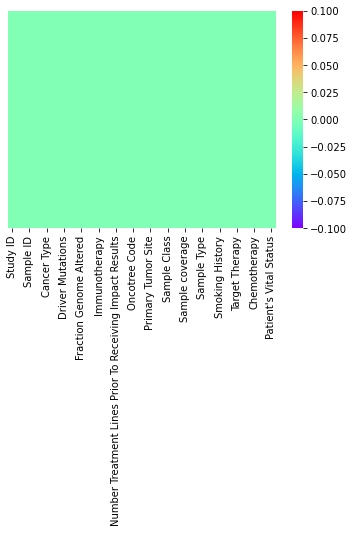

In [15]:
############ DATA VISUALIZATION OF THE CLEAN DATA ############
sns.heatmap(clean_data.isnull(), cmap="rainbow", yticklabels= False)

In [16]:
clean_data.describe()

,Diagnosis Age,Fraction Genome Altered,Number Treatment Lines Prior To Receiving Impact Results,Mutation Count,Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,342.000000,342.000000,342.000000,342.00000,342.000000,342.000000,342.000000,342.000000
mean,60.660819,0.221640,0.818713,4.98538,1.210526,716.274854,5.079885,39.520468
std,12.619709,0.183988,1.149729,3.78875,0.429287,270.878251,3.949630,20.131340
min,16.000000,0.000000,0.000000,0.00000,1.000000,59.000000,0.000000,5.000000
25%,53.000000,0.058375,0.000000,2.00000,1.000000,535.000000,2.218311,20.000000
50%,61.500000,0.194750,0.000000,4.00000,1.000000,711.500000,3.914879,40.000000
75%,69.000000,0.340475,1.000000,7.00000,1.000000,898.750000,6.851038,50.000000
max,93.000000,0.820900,7.000000,26.00000,3.000000,2073.000000,28.838038,90.000000


In [17]:
clean_data

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Driver Mutations,Durable Clinical Benefit,Fraction Genome Altered,Gene Panel,...,Sample pre any Lung Therapy,Sample Type,Sex,Smoking History,Stage At Diagnosis,Target Therapy,TMB (nonsynonymous),Chemotherapy,Tumor Purity,Patient's Vital Status
0,lung_msk_2017,P-0000036,P-0000036-T01-IM3,57,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ROS1,YES,0.0185,IMPACT341,...,YES,Primary,Female,Never,IV,YES,7.764087,YES,30.0,AWD
4,lung_msk_2017,P-0000149,P-0000149-T01-IM3,50,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ERBB2,YES,0.2691,IMPACT341,...,NO,Metastasis,Female,Former light,IV,YES,9.982398,YES,20.0,DOD
5,lung_msk_2017,P-0000149,P-0000149-T02-IM3,50,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ERBB2,YES,0.4502,IMPACT341,...,YES,Metastasis,Female,Former light,IV,YES,4.436621,YES,50.0,DOD
6,lung_msk_2017,P-0000163,P-0000163-T01-IM3,37,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,No mutations,NO,0.0000,IMPACT341,...,NO,Metastasis,Female,Former light,IV,YES,0.000000,YES,5.0,DOD
7,lung_msk_2017,P-0000163,P-0000163-T02-IM3,37,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ERBB2,NO,0.3584,IMPACT341,...,NO,Metastasis,Female,Former light,IV,YES,3.327466,YES,80.0,DOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,lung_msk_2017,P-0009861,P-0009861-T01-IM5,86,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,EGFR,YES,0.0560,IMPACT410,...,YES,Metastasis,Female,Never,IV,YES,1.957439,NO,20.0,AWD
908,lung_msk_2017,P-0009928,P-0009928-T01-IM5,70,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ERBB2,NO,0.2625,IMPACT410,...,YES,Primary,Female,Never,IV,YES,4.893598,NO,30.0,AWD
911,lung_msk_2017,P-0010041,P-0010041-T01-IM5,46,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,ALK,YES,0.2027,IMPACT410,...,YES,Metastasis,Male,Never,IV,YES,0.978720,NO,70.0,AWD
912,lung_msk_2017,P-0010257,P-0010257-T01-IM5,54,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,BRAF,NO,0.1834,IMPACT410,...,YES,Metastasis,Female,Former heavy,IV,YES,9.787197,YES,30.0,DOD


In [18]:
clean_data.to_csv("Group12_Clean Dataset", index = False)

In [ ]:
################# DATA VISUALIZATION #######################
clean_data.columns

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Immunotherapy", data = clean_data)

In [ ]:
sns.countplot(x="Chemotherapy", data= clean_data)

In [ ]:
immuno = len(clean_data[clean_data["Immunotherapy"]=="YES"])
print("The total number of patients that went with Immunotherapy", immuno)
chemo = len(clean_data[clean_data["Chemotherapy"]=="YES"])
print("The total number of patients that went with Chemotherapy", chemo)

In [ ]:
sns.countplot(x="Chemotherapy", hue="Immunotherapy", data=clean_data, palette="inferno")

In [ ]:
sns.swarmplot(x="Chemotherapy",y="Mutation Count", data=clean_data,palette="magma")

In [ ]:
sns.swarmplot(x="Immunotherapy",y="Mutation Count", data=clean_data,palette="magma")

In [ ]:
clean_data.columns

In [ ]:
clean_data.head()

In [ ]:
sns.countplot(x="Smoking History", data=clean_data, palette="hls")

In [ ]:
sns.scatterplot(x="Smoking History", y="Tumor Purity", data=clean_data, palette="cubehelix")

In [ ]:
sns.scatterplot(x="Smoking History", y="Mutation Count", data=clean_data, palette="cubehelix")

In [ ]:
sns.boxplot(x="Smoking History", y="Mutation Count", data=clean_data, palette="cubehelix")

In [ ]:
sns.boxplot(x="Smoking History", y="Tumor Purity", data=clean_data, palette="cubehelix")

In [ ]:
clean_data.head()

In [ ]:
sns.countplot(x="Sample Type", data=clean_data)

In [ ]:
sns.countplot(x="Cancer Type Detailed", data=clean_data)

In [ ]:
clean_data.columns

In [ ]:
len(clean_data.columns)

In [ ]:
sns.countplot(x="Patient's Vital Status", data=clean_data, palette="hls")

In [ ]:
sns.countplot(x="Patient's Vital Status", hue="Immunotherapy", data=clean_data, palette="hls")

In [ ]:
sns.scatterplot(x="Patient's Vital Status",y="Diagnosis Age", hue="Chemotherapy" ,data= clean_data)

In [ ]:
sns.scatterplot(x="Patient's Vital Status",y="Diagnosis Age", hue="Immunotherapy" ,data= clean_data, palette="magma")

In [ ]:
sns.scatterplot(x="Patient's Vital Status",y="Mutation Count",hue="Immunotherapy" ,data= clean_data, palette="magma")

In [ ]:
sns.scatterplot(x="Patient's Vital Status",y="Mutation Count",hue="Chemotherapy" ,data= clean_data, palette="hls")

In [ ]:
sns.countplot(x="Patient's Vital Status", hue="Immunotherapy", data=clean_data, palette="OrRd")

In [ ]:
sns.countplot(x="Patient's Vital Status", hue="Chemotherapy", data=clean_data, palette="magma")

In [ ]:
sns.scatterplot(x="Chemotherapy",y="Mutation Count", data= clean_data, palette="hls")

In [ ]:
sns.scatterplot(x="Immunotherapy",y="Mutation Count", data= clean_data, palette="hls")

In [ ]:
#define data
data =[len(clean_data[clean_data["Immunotherapy"]=="YES"]), len(clean_data[clean_data["Immunotherapy"]=="NO"])]
labels=["YES","NO"]
sns.set_style("whitegrid")

# #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
# #create pie chart
plt.title("Immunotherapy")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
#define data
data =[len(clean_data[clean_data["Chemotherapy"]=="YES"]), len(clean_data[clean_data["Chemotherapy"]=="NO"])]
labels=["YES","NO"]
sns.set_style("whitegrid")

# #define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
# #create pie chart
plt.title("Chemotherapy")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
sns.scatterplot(x="Patient's Vital Status", y="Diagnosis Age", data= clean_data)

In [ ]:
# age vs Immunotherapy and Chemotherapy

immuno=clean_data["Immunotherapy"]=="YES"
chemo=clean_data["Chemotherapy"]=="YES"
age= clean_data["Diagnosis Age"]

sns.boxplot(x= immuno, y= age)


In [ ]:
sns.boxplot(x= chemo, y= age)

In [ ]:
sns.swarmplot(x="Sex", y="Chemotherapy", data=clean_data)

In [ ]:
sns.swarmplot(x="Sex", y="Immunotherapy", data=clean_data)

In [ ]:
clean_data.columns

In [ ]:
clean_data["Chemotherapy"]

In [ ]:
# clean_data["Chemotherapy"].replace(["NO","YES"],[0,1],inplace=True)
# clean_data["Chemotherapy"]
sns.barplot(x="Durable Clinical Benefit", y="Chemotherapy", data=clean_data)


In [ ]:
# clean_data["Immunotherapy"].replace(["NO","YES"],[0,1],inplace=True)
clean_data["Immunotherapy"]

In [ ]:
# encoding
clean_data["Smoking History"].replace(["Never","Former light","Former heavy","Current heavy"],[0,1,2,3],inplace=True)


In [ ]:
clean_data["Smoking History"]

In [ ]:
sns.boxplot(x="Patient's Vital Status",y="Smoking History",data=clean_data)
# "Never=0","Former light=1","Former heavy=2","Current heavy=3"

In [ ]:
sns.boxplot(x="Patient's Vital Status", y="Chemotherapy", data=clean_data)

In [ ]:
sns.boxplot(x="Patient's Vital Status", y="Tumor Purity", data=clean_data)

In [ ]:
sns.boxplot(x="Chemotherapy", y="Tumor Purity", data= clean_data, palette="hls")

In [ ]:
sns.boxplot(x="Immunotherapy", y="Tumor Purity", data=clean_data, palette="hls")

In [ ]:
sns.scatterplot(x="Chemotherapy", y="Tumor Purity", data= clean_data)

In [ ]:
sns.scatterplot(x="Immunotherapy", y="Tumor Purity", data= clean_data)

In [ ]:
sns.boxplot(x="Chemotherapy", y="Mutation Count", data= clean_data)

In [ ]:
sns.boxplot(x="Immunotherapy", y="Mutation Count", data= clean_data)

In [ ]:
sns.boxplot(x="Immunotherapy", y="Smoking History", data= clean_data, palette="hls")

In [ ]:
sns.boxplot(x="Chemotherapy", y="Smoking History", data= clean_data, palette="hls")

In [ ]:
clean_data.columns
sns.swarmplot(x="Chemotherapy",y="Tumor Purity",hue="Patient's Vital Status",data=clean_data,palette="hls")

In [ ]:
sns.swarmplot(x="Immunotherapy",y="Tumor Purity",hue="Patient's Vital Status",data=clean_data,palette="hls")

In [ ]:
sns.swarmplot(x="Immunotherapy",y="Mutation Count",hue="Patient's Vital Status",data=clean_data,palette="hls")

In [ ]:
sns.swarmplot(x="Sex",y ="Durable Clinical Benefit", data=clean_data)

In [ ]:
sns.boxplot(x="Sex",y ="Durable Clinical Benefit", data=clean_data)

In [ ]:
sns.swarmplot(x="Number Treatment Lines Prior To Receiving Impact Results",y ="Durable Clinical Benefit", data=clean_data)

In [ ]:
sns.boxplot(x="Durable Clinical Benefit",y ="Number Treatment Lines Prior To Receiving Impact Results", data=clean_data)

In [ ]:
sns.swarmplot(x="Durable Clinical Benefit",y ="Mutation Count", data=clean_data)

In [ ]:
sns.barplot(x="Durable Clinical Benefit",y ="Mutation Count", data=clean_data)

In [ ]:
sns.scatterplot(x="Durable Clinical Benefit",y ="Tumor Purity", data=clean_data)

In [ ]:
sns.boxplot(x="Durable Clinical Benefit",y ="Tumor Purity", data=clean_data)

In [ ]:
sns.boxplot(x="Immunotherapy",y ="Durable Clinical Benefit", data=clean_data)

In [ ]:
sns.boxplot(x="Chemotherapy",y ="Durable Clinical Benefit", data=clean_data)

In [ ]:
sns.boxplot(x="Durable Clinical Benefit",y ="Diagnosis Age", data=clean_data)

In [ ]:
sns.boxplot(x="Durable Clinical Benefit",y ="", data=clean_data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn import metrics 
import scipy

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
# clean_data["Sex"].replace(["Male","Female"],[1,0],inplace=True)
# clean_data["Sex"]

In [ ]:
# sns.countplot(x="Target Therapy", data=clean_data)
# clean_data["Target Therapy"].replace(["NO","YES"],[0,1],inplace=True)
clean_data["Gene Panel"].replace(["IMPACT341","IMPACT410"],[0,1],inplace=True)
clean_data["Gene Panel"]
# clean_data["Target Therapy"]

In [ ]:
# clean_data["Patient's Vital Status"].replace(["AWD","DOD","DUK","AWD-M","NED-M"],[0,1,2,3,4], inplace=True)
clean_data["Patient's Vital Status"]

In [ ]:
# clean_data["Durable Clinical Benefit"].replace(["await"],[2],inplace=True)
clean_data["Durable Clinical Benefit"].replace(["N_stoppedSE"],[4],inplace=True)

In [ ]:
clean_data.columns

In [ ]:
# x = clean_data.drop(columns=['Study ID', 'Patient ID', 'Sample ID','Cancer Type','Cancer Type Detailed', 'Driver Mutations', 'Durable Clinical Benefit',
#        "Oncotree Code","Gene Panel",
#        'Institute Source',"Immunotherapy", "Chemotherapy",
#        'Overall Patient Histology',
#        'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
#        'Number of Samples Per Patient', 'Sample coverage',
#        'Sample pre any Lung Therapy', 'Sample Type','Stage At Diagnosis', "Patient's Vital Status"])
# x.columns
# # x = scaler.fit(x)
# y= clean_data.drop(columns=['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age', 'Cancer Type',
#        'Cancer Type Detailed', 'Driver Mutations', 'Durable Clinical Benefit',
#        'Fraction Genome Altered', 'Gene Panel','Institute Source',
#        'Number Treatment Lines Prior To Receiving Impact Results',
#        'Mutation Count', 'Oncotree Code', 'Overall Patient Histology',
#        'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
#        'Number of Samples Per Patient', 'Sample coverage',
#        'Sample pre any Lung Therapy', 'Sample Type', 'Sex', 'Smoking History',
#        'Stage At Diagnosis', 'Target Therapy', 'TMB (nonsynonymous)', 'Tumor Purity', "Patient's Vital Status"])
# y.columns
# x

In [ ]:
x= clean_data.drop(columns=['Study ID', 'Patient ID', 'Sample ID','Cancer Type','Cancer Type Detailed', 'Driver Mutations',
       'Institute Source',"Immunotherapy", "Chemotherapy",
       'Overall Patient Histology',"Oncotree Code",
       'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage',
       'Sample pre any Lung Therapy', 'Sample Type','Stage At Diagnosis' ])
y= clean_data["Durable Clinical Benefit"]
x.columns

# y.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)
X_train.dtypes

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
predictions2 = clf.predict(X_test)
# accuracy_score(y_test, predictions2)
print("ACCURACY OF THE MODEL(in %): ", metrics.accuracy_score(y_test, predictions2)*100)
# dta=accuracy_score(y_test, predictions2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)
# accuracy_score(y_test, predictions2)
print("ACCURACY OF THE MODEL(in %): ", metrics.accuracy_score(y_test, predictions2)*100)
# dta=accuracy_score(y_test, predictions2)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions2 = dtc.predict(X_test)
# accuracy_score(y_test, predictions2)
print("ACCURACY OF THE MODEL(in %): ", metrics.accuracy_score(y_test, predictions2)*100)
# dta=accuracy_score(y_test, predictions2)

In [ ]:
sns.countplot(x="Durable Clinical Benefit", data=clean_data)

In [ ]:
######### Predictive model for Suitable Therapy ###############
y= clean_data.drop(columns=['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age', 'Cancer Type',
       'Cancer Type Detailed', 'Driver Mutations', 'Durable Clinical Benefit',
       'Fraction Genome Altered', 'Gene Panel','Institute Source',
       'Number Treatment Lines Prior To Receiving Impact Results',
       'Mutation Count', 'Oncotree Code', 'Overall Patient Histology',
       'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage',
       'Sample pre any Lung Therapy', 'Sample Type', 'Sex', 'Smoking History',
       'Stage At Diagnosis', 'Target Therapy', 'TMB (nonsynonymous)', 'Tumor Purity', "Patient's Vital Status"])
y.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)
X_train.dtypes

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
predictions2 = clf.predict(X_test)
# accuracy_score(y_test, predictions2)
print("ACCURACY OF THE MODEL(in %): "
      , metrics.accuracy_score(y_test, predictions2)*100)
# dta=accuracy_score(y_test, predictions2)

In [ ]:
############ Predictive Model For the Patient's Vital Status ############
x= clean_data.drop(columns=['Study ID', 'Patient ID', 'Sample ID','Cancer Type','Cancer Type Detailed', 'Driver Mutations',
       'Institute Source',"Immunotherapy", "Chemotherapy",
       'Overall Patient Histology',"Oncotree Code",
       'Primary Tumor Site', 'Recurrent/metastatic disease', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage',
       'Sample pre any Lung Therapy', 'Sample Type','Stage At Diagnosis',"Patient's Vital Status" ])
y = clean_data["Patient's Vital Status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)
X_train.dtypes

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
predictions2 = clf.predict(X_test)
# accuracy_score(y_test, predictions2)
print("ACCURACY OF THE MODEL(in %): ", metrics.accuracy_score(y_test, predictions2)*100)
# dta=accuracy_score(y_test, predictions2)